# Ill-conditioning of Vandermonde matrix


**Randall Romero Aguilar, PhD**

This demo is based on the original Matlab demo accompanying the  <a href="https://mitpress.mit.edu/books/applied-computational-economics-and-finance">Computational Economics and Finance</a> 2001 textbook by Mario Miranda and Paul Fackler.

Original (Matlab) CompEcon file: **demlin02.m**

Running this file requires the Python version of CompEcon. This can be installed with pip by running

    !pip install compecon --upgrade

<i>Last updated: 2022-Ago-19</i>
<hr>


In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import norm, cond, solve
import time
import matplotlib.pyplot as plt
np.set_printoptions(precision=4)
plt.style.use('seaborn-dark')
plt.style.use('seaborn-talk')

Compute approximation error and matrix condition number

In [2]:
nvalues = np.arange(6, 101)

data = pd.DataFrame(index=nvalues, columns=['conv', 'errv'], dtype=float)
data.index.name = 'n'

for n in nvalues:
    v = np.vander(1.0 + np.arange(n))
    data.loc[n, 'errv'] = np.log10(norm(np.identity(n) - solve(v, v), ord=np.inf))
    data.loc[n, 'conv'] = np.log10(cond(v, p=2))

data.rename(columns=dict(errv="$||I-V^{-1}V||_\infty$", conv='Condition number of $V$'), inplace=True) 

Smooth using quadratic function

In [3]:
X = np.vstack([np.ones_like(nvalues), nvalues, nvalues**2]).T
b = np.linalg.lstsq(X, data)[0]
data_smooth = pd.DataFrame(10 ** (X @ b), index=data.index, columns=data.columns)

#b = np.linalg.lstsq(X, conv)[0]
#conv = 10 ** (X @ b)

C:\Users\randa\AppData\Local\Temp\ipykernel_18304\1182016897.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  b = np.linalg.lstsq(X, data)[0]


Plot matrix condition numbers

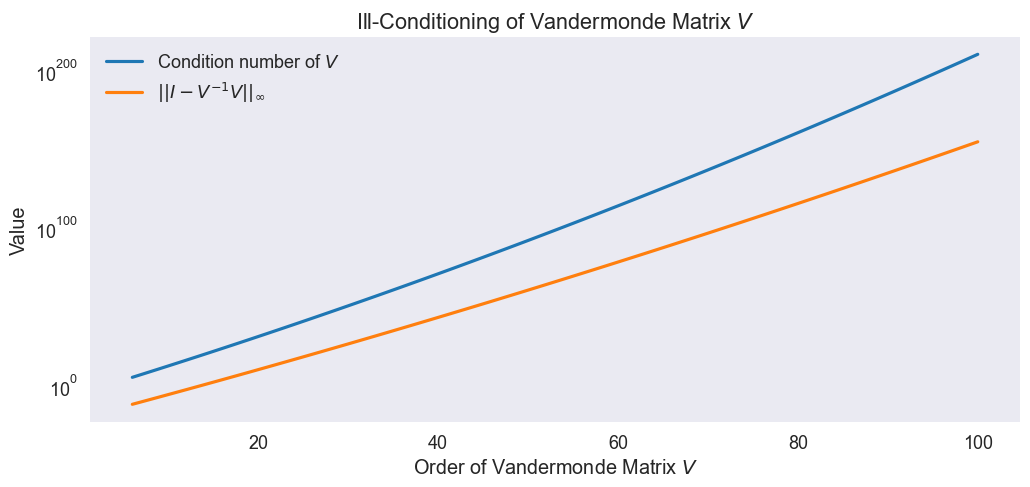

In [4]:
fig, ax = plt.subplots(figsize=[12, 5])
ax.set_yscale('log')
data_smooth.plot(ax=ax)
ax.set(
    title='Ill-Conditioning of Vandermonde Matrix $V$', 
    xlabel='Order of Vandermonde Matrix $V$', 
    ylabel='Value', 
    yscale='log', 
    yticks=[1,1e100,1e200]);